# **Question 1**

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('onw-1.4')
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading onw-1.4: Package 'onw-1.4' not found in
[nltk_data]     index


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import wordcloud, STOPWORDS
%matplotlib inline

In [ ]:
tweets=pd.read_csv('/content/Elon_musk (1).csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

## **Text Preprocessing**

In [ ]:
tweets=[Text.strip()for Text in tweets.Text]
tweets=[Text for Text in tweets if Text]
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [ ]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [ ]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [ ]:
import re
no_url_text=re.sub('http\S+','',no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [ ]:
len(text_tokens)

17847

In [ ]:
from pandas.io.formats.style import non_reducing_slice
my_stop_words=stopwords.words('english')

sw_list=['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)


['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [ ]:
lower_words=[text.lower() for text in no_stop_tokens]
print(lower_words[100:200])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster']


In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word)for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'st

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage 100 m

## **Feature Extration**

## **Using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)


In [ ]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2347, 'trace': 3012, 'cyberpunk': 767, 'hdr': 1358, 'nextlevel': 1960, 'have': 1353, 'try': 3043, 'great': 1305, 'interview': 1556, 'doge': 890, 'underestimate': 3176, 'congratulation': 675, 'tesla': 2917, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1640, 'year': 3392, 'now': 1988, 'next': 1959, 'even': 1031, 'happy': 1340, 'new': 1957, 'ox': 2089, 'frodo': 1207, 'underdoge': 3175, 'all': 197, 'thought': 2954, 'would': 3378, 'fail': 1091, 'himself': 1402, 'haha': 1328, 'thank': 2928, 'indeed': 1497, 'tweet': 3058, 'definitely': 804, 'represent': 2414, 'realworld': 2362, 'time': 2970, 'allocation': 199, 'the': 2933, 'entertaining': 1001, 'outcome': 2068, 'likely': 1695, 'just': 1598, 'send': 2557, 'agree': 179, 'clubhouse': 613, 'it': 1575, 'get': 1266, 'real': 2357, 'buy': 502, 'dogecoin': 892, 'lil': 1696, 'toddler': 2982, 'hodler': 1408, 'he': 1359, 'issue': 1574, 'sentencing': 2562, 'seem': 2549, 'bit': 418, 'high': 1393, 'fix': 1152, 'please': 218

In [ ]:
print(cv.get_feature_names_out()[100:200])

['74' '78' '7th' '90' '9007' '922' '948' '95' '99' 'aber' 'able' 'abo'
 'aboard' 'abort' 'about' 'above' 'absence' 'absolute' 'absolutely'
 'absorb' 'absorption' 'absurd' 'absurdly' 'ac' 'academia' 'accel'
 'accelera' 'accelerate' 'acceleration' 'accelerator' 'accept'
 'acceptable' 'access' 'accessible' 'accident' 'accidental' 'accommodate'
 'account' 'accura' 'accuracy' 'accurate' 'ace' 'achieve' 'achievement'
 'achy' 'acquisition' 'across' 'action' 'active' 'activity' 'actual'
 'actuall' 'actually' 'actuary' 'adagio' 'add' 'additive' 'address'
 'administer' 'adult' 'advanc' 'advance' 'advanced' 'advantage'
 'adventure' 'advertise' 'advice' 'advise' 'aero' 'afb' 'affair' 'affect'
 'affordable' 'africa' 'after' 'afternoon' 'age' 'ago' 'agony' 'agree'
 'ah' 'ahead' 'ahem' 'ai' 'aim' 'air' 'aircraft' 'airplane' 'ak' 'aka'
 'alert' 'alexander' 'algo' 'algorithm' 'alien' 'aliens' 'align' 'all'
 'allocati' 'allocation']


In [ ]:
print(tweetscv.toarray().shape)

(11486, 3412)


## **2.CountVectorizer with N-grams(Bigrams & Trigrams)**

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actually' 'ai' 'also' 'back' 'big' 'booster' 'car' 'come' 'cool' 'could'
 'crew' 'day' 'design' 'do' 'dragon' 'earth' 'engine' 'even' 'ever'
 'exactly' 'falcon' 'first' 'flight' 'fsd' 'future' 'get' 'go' 'good'
 'great' 'haha' 'hard' 'high' 'if' 'it' 'just' 'land' 'launch' 'like'
 'look' 'lot' 'make' 'many' 'mar' 'maybe' 'mission' 'model' 'month' 'much'
 'need' 'new' 'next' 'no' 'not' 'ok' 'one' 'part' 'people' 'point'
 'pretty' 'probably' 'production' 'right' 'rocket' 'rt' 'say' 'seem'
 'soon' 'space' 'spacex' 'starlink' 'starship' 'start' 'still' 'super'
 'sure' 'take' 'tesla' 'test' 'thank' 'that' 'the' 'there' 'they' 'think'
 'this' 'time' 'true' 'try' 'ufe0f' 'use' 'way' 'we' 'week' 'well' 'will'
 'work' 'would' 'yeah' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **TF-IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '13' '20' '2020' '30' '40' '4d' '60' 'able' 'absolutely'
 'access' 'accurate' 'actually' 'add' 'after' 'ago' 'agree' 'ai' 'aim'
 'air' 'all' 'almost' 'already' 'also' 'although' 'always' 'amazing' 'and'
 'another' 'appear' 'apply' 'appreciate' 'approval' 'arm' 'around'
 'article' 'as' 'astronaut' 'at' 'autopilot' 'awesome' 'back' 'bad' 'bar'
 'base' 'battery' 'be' 'become' 'berlin' 'beta' 'big' 'bit' 'boca' 'body'
 'booster' 'brain' 'bring' 'bs' 'build' 'burn' 'but' 'buy' 'cake' 'call'
 'camera' 'can' 'car' 'cargo' 'catch' 'cell' 'ch4' 'chance' 'change'
 'china' 'civilization' 'close' 'cold' 'color' 'come' 'company' 'complete'
 'computer' 'confirm' 'congratulation' 'control' 'cool' 'cost' 'could'
 'course' 'cov' 'crazy' 'create' 'crew' 'critical' 'curevac' 'cyberpunk'
 'cybertruck' 'datum' 'day' 'deep' 'definitely' 'delivery' 'design'
 'detail' 'difference' 'different' 'do' 'dock' 'doge' 'dojo' 'dragon'
 'drive' 'droneship' 'due' 'dumb' 'early' 'earth' 'easy' 'electric'
 'e

Generate word cloud

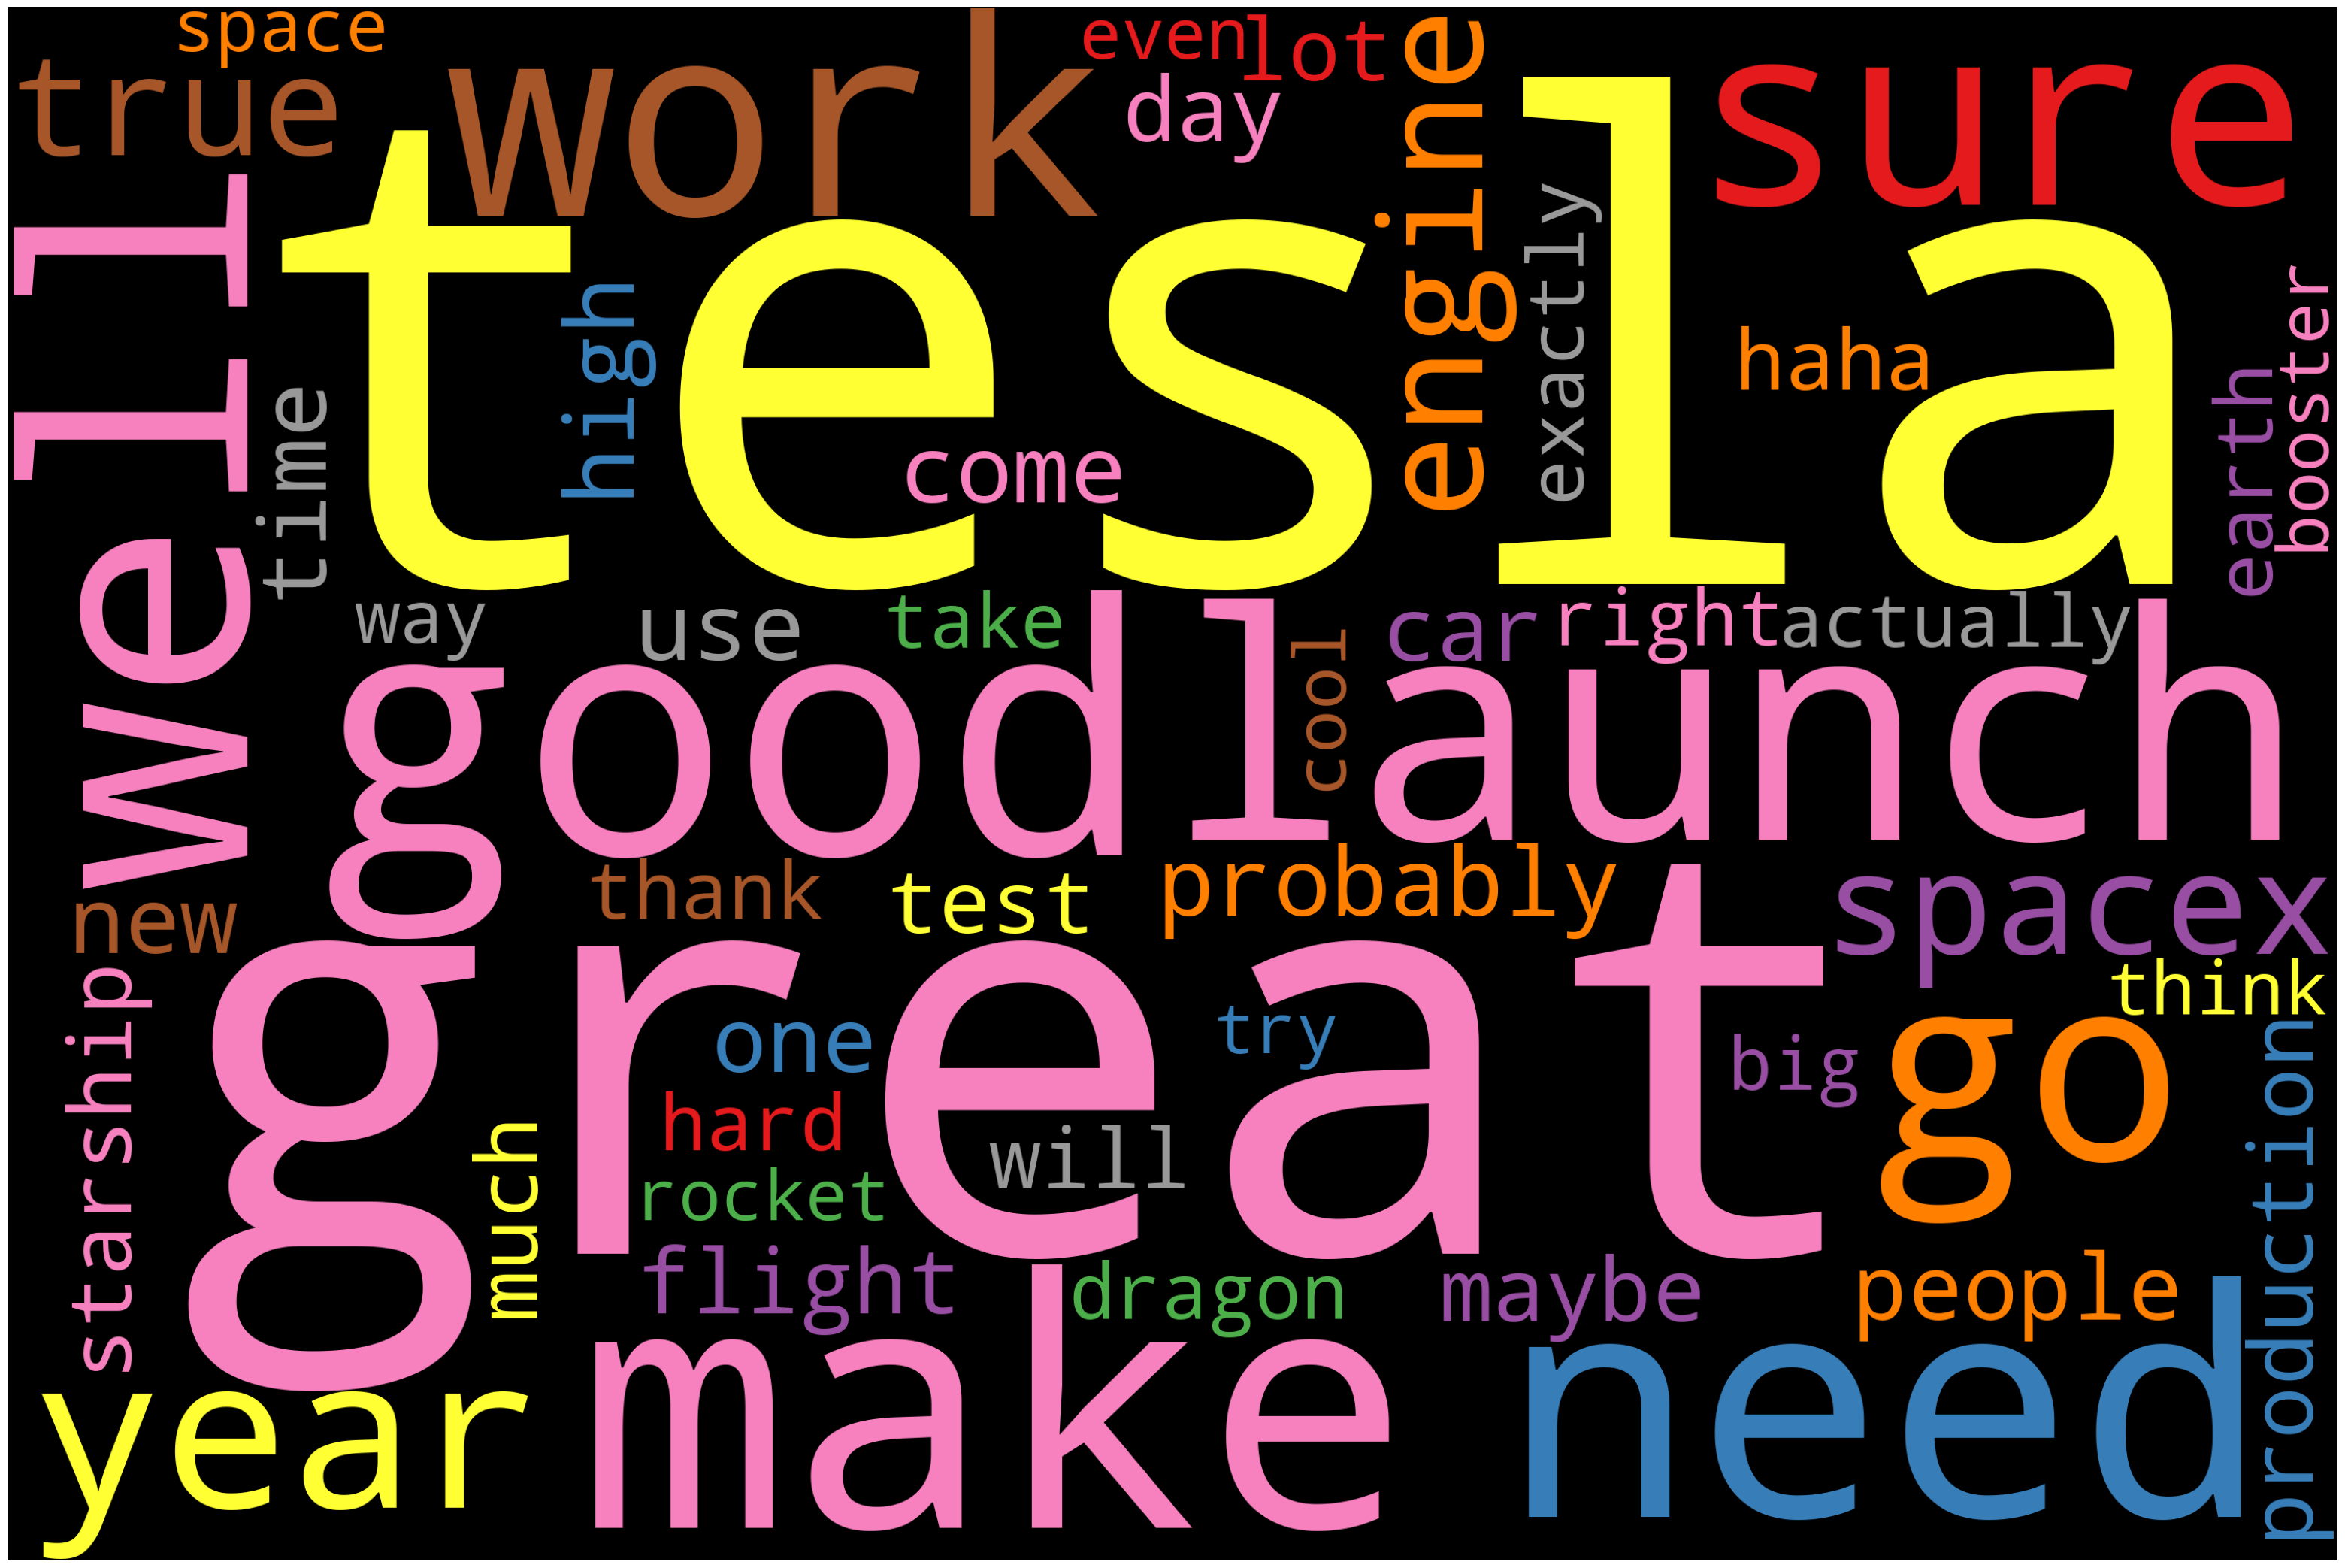

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')


STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=wordcloud.WordCloud(width=3000,height=2000,background_color='black',max_words=50,colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)


In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
  print(token,token.pos_)

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INTJ
1 NUM
orb

In [ ]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[100:200])

['time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]


word  count
0   tesla     76
1    make     64
2  launch     62
3    year     49
4    work     49
5    need     48
6      go     43
7    come     42
8     day     38
9     get     37

<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

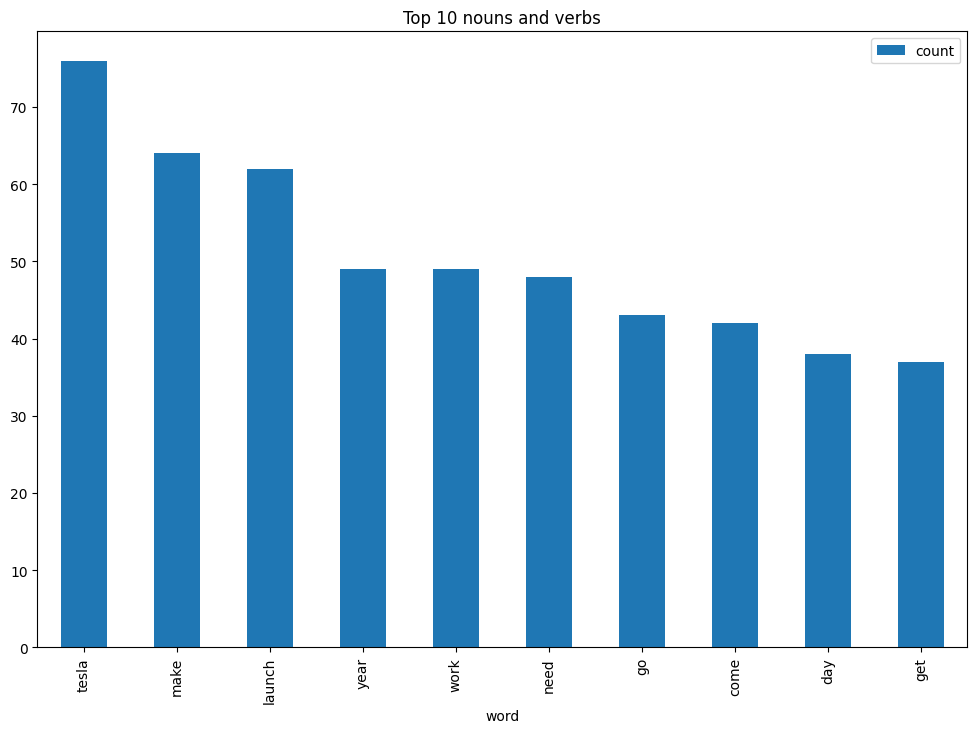

In [ ]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')


In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

# **Question 2**

### **Extract reviewa of any product from ecommerce website like amazon and Perform emotion mining**

In [ ]:
import nltk
import requests
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 5600x1400 with 0 Axes>

# **Performing Web Scraping**

### **Adding Header and Scraoing**

In [ ]:
headers = { 'authority': 'www.amazon.in',
            'accept-language': 'en-US,en;q=0.9',
            'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = bs(r.text, 'html.parser')
    return soup



In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {  'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                        'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                        'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                        'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

# **Looping In URL**

In [ ]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Redgear-Cloak-Gaming-Headphones-Microphone/product-reviews/B07T9FV9YP/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

## **Creating Dataframe With ReviewList**

In [ ]:
rg = pd.DataFrame(reviewlist)

rg

Title  Rating  \
0                4.0 out of 5 stars\nbudget friendly..     4.0   
1                              4.0 out of 5 stars\nMic     4.0   
2       4.0 out of 5 stars\nJust Go For Low price only     4.0   
3    4.0 out of 5 stars\nSuper usefull and really g...     4.0   
4          4.0 out of 5 stars\nSit In A Room With AC !     4.0   
..                                                 ...     ...   
105                           3.0 out of 5 stars\nGood     3.0   
106             3.0 out of 5 stars\nSome minus points.     3.0   
107      5.0 out of 5 stars\nbest product in low price     5.0   
108  5.0 out of 5 stars\nSize is too large but High...     5.0   
109     4.0 out of 5 stars\nJustified at price of 400.     4.0   

                                                Review  \
0    if u want headphone just for completing and us...   
1    Overall best headphone under 500 (in sale)I bo...   
2    Pros : Very low price,Quality of meterial is v...   
3    Ordered a bunch of it for office meetings and ...   
4    The Cushion pads makes your ears swaeats a lot...   
..                                                 ...   
105                         Sound quality was very low   
106  Sound is very low with my PC, not as I expecte...   
107                          best product in low price   
108  Highly Recommended and Seller is appreciated f...   
109  Nice at 400 INR, would not pay more than 500 f...   

                                Review_Date  
0    Reviewed in India on 11 September 2023  
1    Reviewed in India on 27 September 2023  
2    Reviewed in India on 28 September 2023  
3    Reviewed in India on 16 September 2023  
4    Reviewed in India on 23 September 2023  
..                                      ...  
105       Reviewed in India on 29 July 2023  
106       Reviewed in India on 17 July 2023  
107  Reviewed in India on 11 September 2023  
108  Reviewed in India on 23 September 2023  
109        Reviewed in India on 16 May 2023  

[110 rows x 4 columns]

In [ ]:
rg["Review_Date"] = rg["Review_Date"].replace('Reviewed in India on','', regex=True)
rg['Review_Date'] = pd.to_datetime(rg['Review_Date'])

rg

Title  Rating  \
0                4.0 out of 5 stars\nbudget friendly..     4.0   
1                              4.0 out of 5 stars\nMic     4.0   
2       4.0 out of 5 stars\nJust Go For Low price only     4.0   
3    4.0 out of 5 stars\nSuper usefull and really g...     4.0   
4          4.0 out of 5 stars\nSit In A Room With AC !     4.0   
..                                                 ...     ...   
105                           3.0 out of 5 stars\nGood     3.0   
106             3.0 out of 5 stars\nSome minus points.     3.0   
107      5.0 out of 5 stars\nbest product in low price     5.0   
108  5.0 out of 5 stars\nSize is too large but High...     5.0   
109     4.0 out of 5 stars\nJustified at price of 400.     4.0   

                                                Review Review_Date  
0    if u want headphone just for completing and us...  2023-09-11  
1    Overall best headphone under 500 (in sale)I bo...  2023-09-27  
2    Pros : Very low price,Quality of meterial is v...  2023-09-28  
3    Ordered a bunch of it for office meetings and ...  2023-09-16  
4    The Cushion pads makes your ears swaeats a lot...  2023-09-23  
..                                                 ...         ...  
105                         Sound quality was very low  2023-07-29  
106  Sound is very low with my PC, not as I expecte...  2023-07-17  
107                          best product in low price  2023-09-11  
108  Highly Recommended and Seller is appreciated f...  2023-09-23  
109  Nice at 400 INR, would not pay more than 500 f...  2023-05-16  

[110 rows x 4 columns]

## **Performing EDA In Dataset**

Visualizing the Data

In [ ]:
ts = rg[['Rating','Review_Date']]
ts.set_index('Review_Date', inplace=True)

ts.head()

Rating
Review_Date        
2023-09-11      4.0
2023-09-27      4.0
2023-09-28      4.0
2023-09-16      4.0
2023-09-23      4.0

# **Plotting Barplot**

Text(0, 0.5, 'Count')

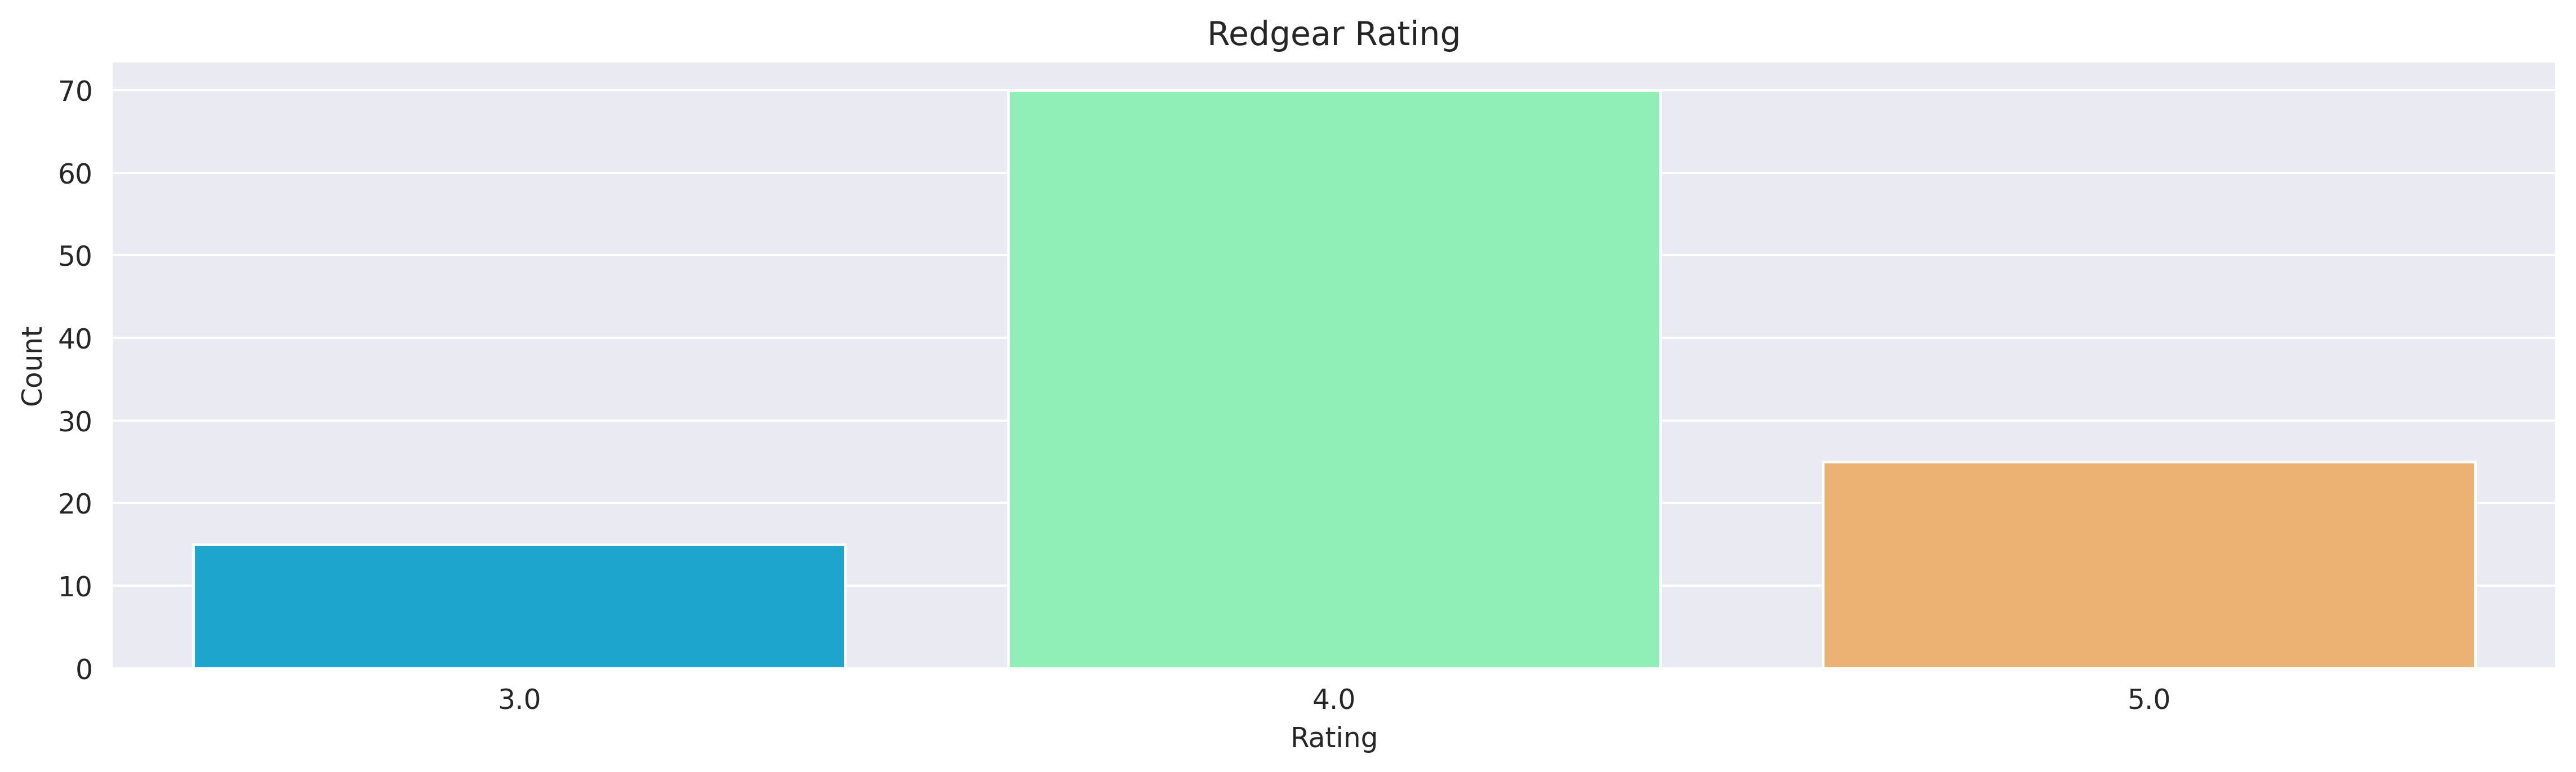

In [ ]:
plt.title('Redgear Rating')
sns.barplot(x=ts['Rating'].value_counts().index,y= ts['Rating'].value_counts().values, palette = 'rainbow')
plt.xlabel('Rating')
plt.ylabel('Count')

<Axes: ylabel='Rating'>

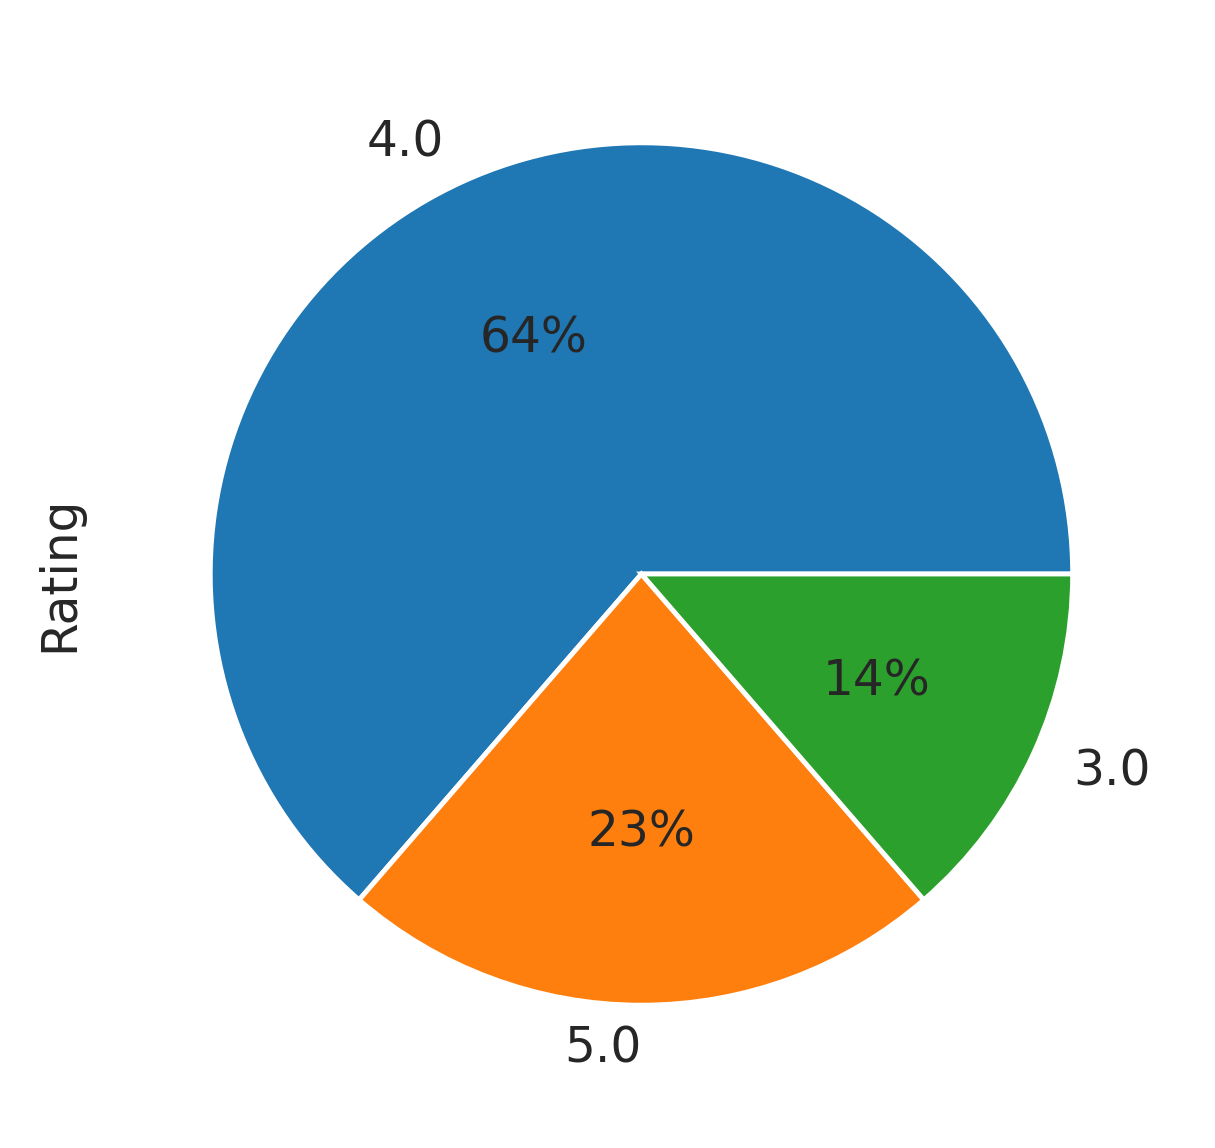

In [ ]:
ts['Rating'].value_counts().plot(kind='pie',autopct='%1.00f%%')

## **Plotting Lineplot**

<Axes: xlabel='Review_Date'>

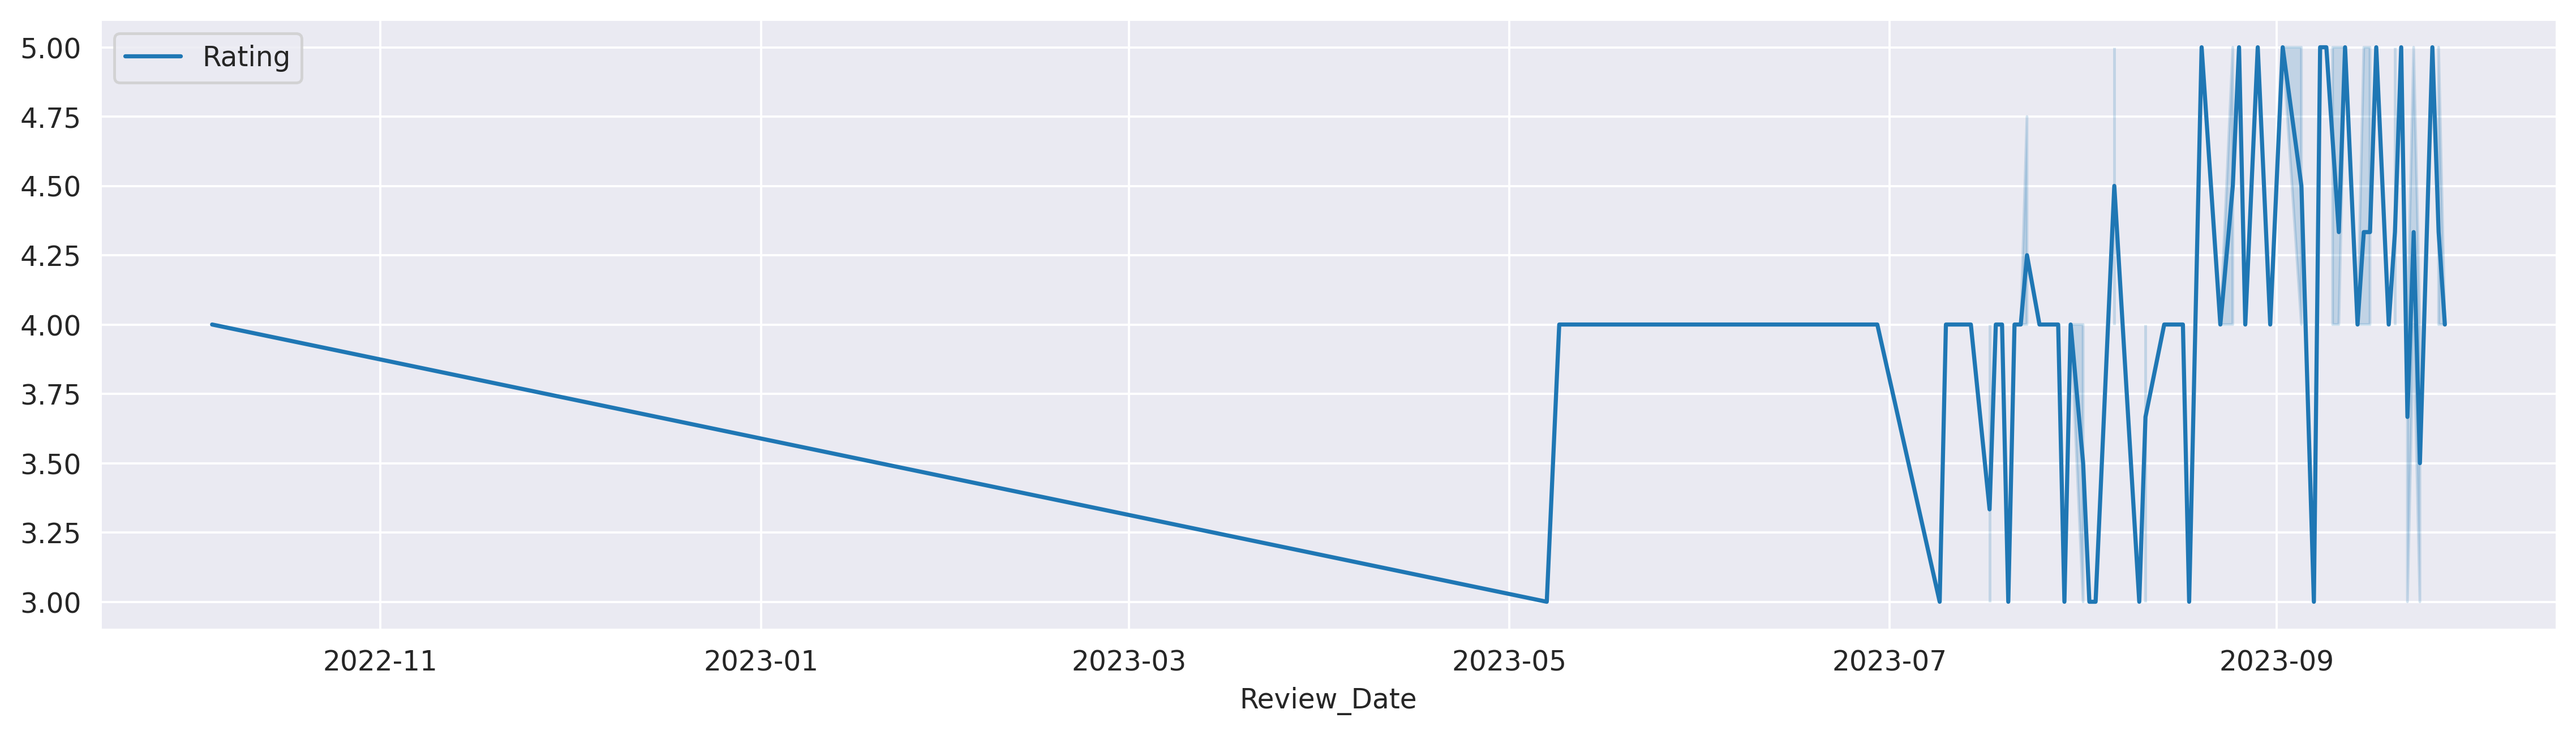

In [ ]:
sns.lineplot(ts)

## **Applying Lemmatization and Removing Stopword**

In [ ]:
def corpu(em, Text):
    lemma = WordNetLemmatizer()

    corpus = []

    for i in range(len(em)):
        msg = re.sub('[^a-zA-Z]',' ',em[Text][i])
        msg = msg.lower()
        msg = msg.split()

        msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
        msg = ' '.join(msg)
        corpus.append(msg)

    return corpus

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
corpus = corpu(rg, 'Review')

corpus

['u want headphone completing using daily rough use doest matter quality go u want quality u r welcome product gud cushion gud u problem starting like pain head ear ot take month think ur headset adjust ur head u large head wont recomend sweat lot even normal temp sometimes u idk happens headband stretchable yea afraid breaking metalwont recomend fps game casual would recomend use quality boost software like fx setup nice software comfort max hr hr also people pain start take min break mic bro dont greedy u want one word ok ok',
 'overall best headphone sale bought r best price mic gold gamer youtuber record audio buy thismic like average give clear voice',
 'pro low price quality meterial strong good color brand lightscons use long time getting ear pain look feel heavy hard hold',
 'ordered bunch office meeting awesome mic good due storage issue band mic created bit issue speaking mic e meeting apart good',
 'cushion pad make ear swaeats lot cause summer hot environment please sit roo

## **Performing Word Tokenize**

In [ ]:
def word_tok(corpus):
    word = []

    for i in corpus:
        words = word_tokenize(i)
        word.append(words)

    return word

In [ ]:
nltk.download('punkt')
word = word_tok(corpus)

word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['u',
  'want',
  'headphone',
  'completing',
  'using',
  'daily',
  'rough',
  'use',
  'doest',
  'matter',
  'quality',
  'go',
  'u',
  'want',
  'quality',
  'u',
  'r',
  'welcome',
  'product',
  'gud',
  'cushion',
  'gud',
  'u',
  'problem',
  'starting',
  'like',
  'pain',
  'head',
  'ear',
  'ot',
  'take',
  'month',
  'think',
  'ur',
  'headset',
  'adjust',
  'ur',
  'head',
  'u',
  'large',
  'head',
  'wont',
  'recomend',
  'sweat',
  'lot',
  'even',
  'normal',
  'temp',
  'sometimes',
  'u',
  'idk',
  'happens',
  'headband',
  'stretchable',
  'yea',
  'afraid',
  'breaking',
  'metalwont',
  'recomend',
  'fps',
  'game',
  'casual',
  'would',
  'recomend',
  'use',
  'quality',
  'boost',
  'software',
  'like',
  'fx',
  'setup',
  'nice',
  'software',
  'comfort',
  'max',
  'hr',
  'hr',
  'also',
  'people',
  'pain',
  'start',
  'take',
  'min',
  'break',
  'mic',
  'bro',
  'dont',
  'greedy',
  'u',
  'want',
  'one',
  'word',
  'ok',
  'ok']

## **Creating Word Cloud**

In [ ]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS

    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('worldcloud',size = 50)

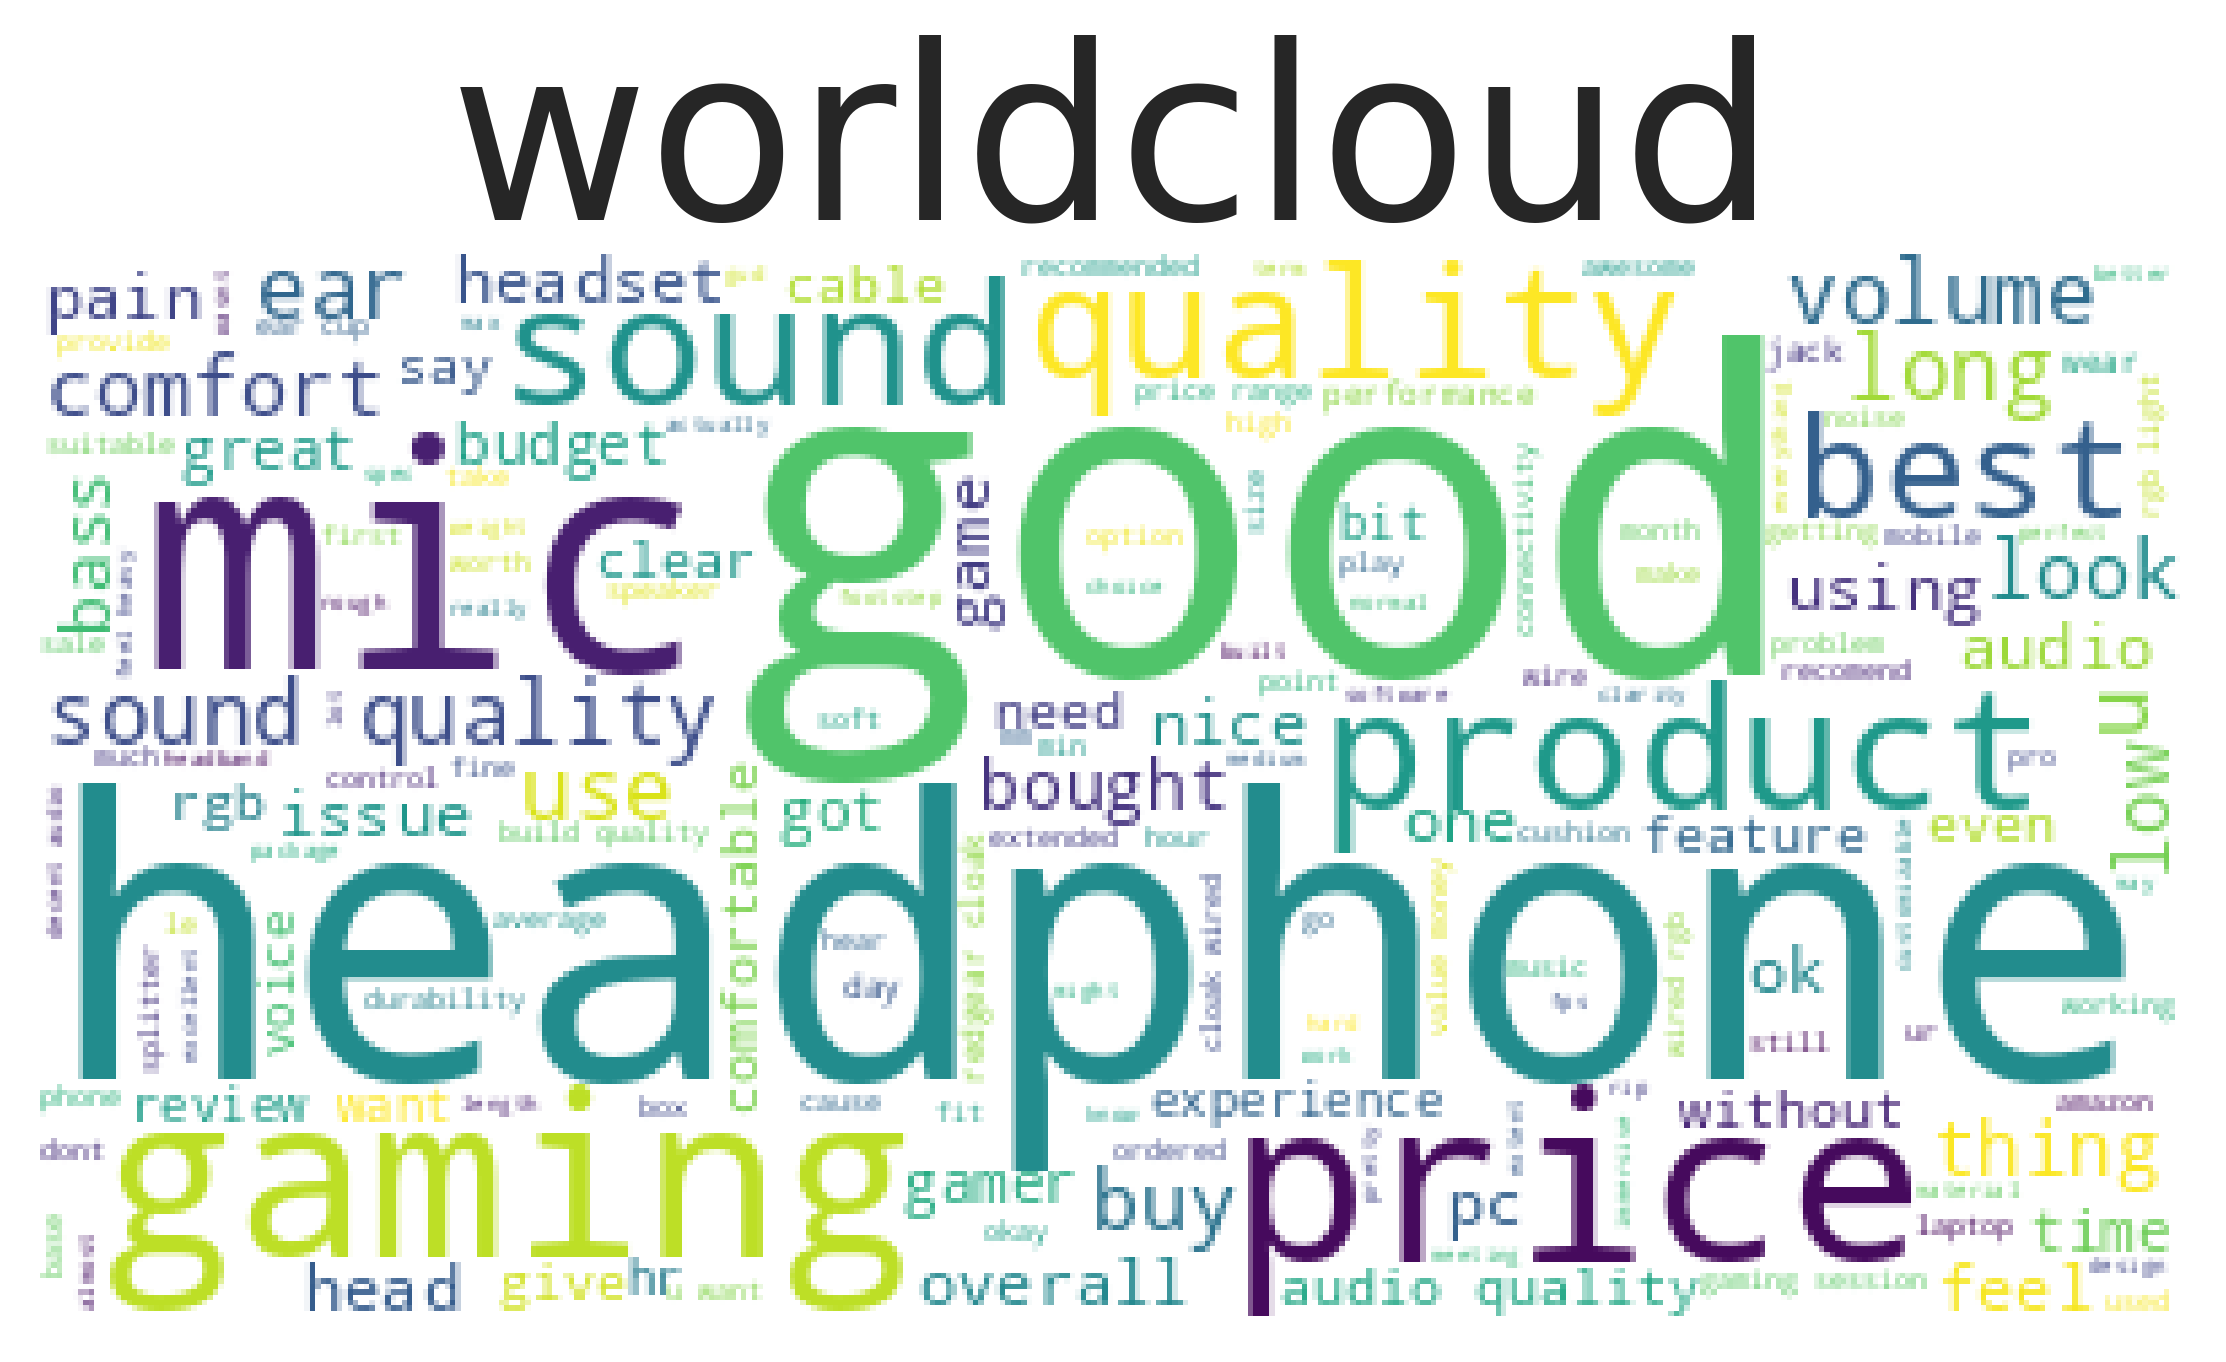

In [ ]:
worldcloud(corpus)

## **Performing Data Preprocessing**

Creating Bag Of Words

In [ ]:
cv = CountVectorizer()

x=cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv.get_feature_names_out()

array(['aasum', 'able', 'absolutely', 'acceptable', 'according',
       'acctually', 'across', 'actually', 'add', 'added', 'additional',
       'adjust', 'adjustable', 'adjusting', 'affecting', 'afford',
       'affordable', 'afraid', 'ago', 'allign', 'allowing', 'allows',
       'almost', 'also', 'although', 'amazing', 'amazon', 'amzon',
       'anazon', 'ant', 'anyone', 'anything', 'anythingrgb', 'apart',
       'appearance', 'appears', 'apply', 'appreciate', 'appreciated',
       'assumed', 'atleast', 'attractive', 'audio', 'audiobalance',
       'audiophiles', 'august', 'average', 'averagemic', 'avg', 'awesome',
       'awsome', 'background', 'bad', 'balanced', 'band', 'bang', 'bar',
       'base', 'basic', 'bass', 'battery', 'becomes', 'beginner', 'bend',
       'best', 'better', 'betyer', 'bgmi', 'big', 'bit', 'bite', 'block',
       'bluetooth', 'boast', 'boat', 'boatrockers', 'boom', 'boosed',
       'boost', 'boosted', 'bought', 'box', 'braided', 'brand',
       'branding', 'b

In [ ]:
bow = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

bow

aasum  able  absolutely  acceptable  according  acctually  across  \
0        0     0           0           0          0          0       0   
1        0     0           0           0          0          0       0   
2        0     0           0           0          0          0       0   
3        0     0           0           0          0          0       0   
4        0     0           0           0          0          0       0   
..     ...   ...         ...         ...        ...        ...     ...   
105      0     0           0           0          0          0       0   
106      0     0           0           0          0          0       0   
107      0     0           0           0          0          0       0   
108      0     0           0           0          0          0       0   
109      0     0           0           0          0          0       0   

     actually  add  added  ...  world  worse  worth  would  writing  yea  \
0           0    0      0  ...      0      0      0      1        0    1   
1           0    0      0  ...      0      0      0      0        0    0   
2           0    0      0  ...      0      0      0      0        0    0   
3           0    0      0  ...      0      0      0      0        0    0   
4           0    0      0  ...      0      0      0      0        0    0   
..        ...  ...    ...  ...    ...    ...    ...    ...      ...  ...   
105         0    0      0  ...      0      0      0      0        0    0   
106         0    0      0  ...      0      0      0      0        0    0   
107         0    0      0  ...      0      0      0      0        0    0   
108         0    0      0  ...      0      0      0      0        0    0   
109         0    0      0  ...      0      0      0      1        0    0   

     yeah  year  youtuber  yr  
0       0     0         0   0  
1       0     0         1   0  
2       0     0         0   0  
3       0     0         0   0  
4       0     0         0   0  
..    ...   ...       ...  ..  
105     0     0         0   0  
106     0     0         0   0  
107     0     0         0   0  
108     0     0         0   0  
109     0     0         0   0  

[110 rows x 774 columns]

## **Creating** **Tf-idf**

In [ ]:
tf = TfidfVectorizer()

x_tf = tf.fit_transform(corpus)

x_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26744381,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tf.get_feature_names_out()

array(['aasum', 'able', 'absolutely', 'acceptable', 'according',
       'acctually', 'across', 'actually', 'add', 'added', 'additional',
       'adjust', 'adjustable', 'adjusting', 'affecting', 'afford',
       'affordable', 'afraid', 'ago', 'allign', 'allowing', 'allows',
       'almost', 'also', 'although', 'amazing', 'amazon', 'amzon',
       'anazon', 'ant', 'anyone', 'anything', 'anythingrgb', 'apart',
       'appearance', 'appears', 'apply', 'appreciate', 'appreciated',
       'assumed', 'atleast', 'attractive', 'audio', 'audiobalance',
       'audiophiles', 'august', 'average', 'averagemic', 'avg', 'awesome',
       'awsome', 'background', 'bad', 'balanced', 'band', 'bang', 'bar',
       'base', 'basic', 'bass', 'battery', 'becomes', 'beginner', 'bend',
       'best', 'better', 'betyer', 'bgmi', 'big', 'bit', 'bite', 'block',
       'bluetooth', 'boast', 'boat', 'boatrockers', 'boom', 'boosed',
       'boost', 'boosted', 'bought', 'box', 'braided', 'brand',
       'branding', 'b

In [ ]:
tf_idf = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())

tf_idf

aasum  able  absolutely  acceptable  according  acctually  across  \
0      0.0   0.0         0.0         0.0        0.0        0.0     0.0   
1      0.0   0.0         0.0         0.0        0.0        0.0     0.0   
2      0.0   0.0         0.0         0.0        0.0        0.0     0.0   
3      0.0   0.0         0.0         0.0        0.0        0.0     0.0   
4      0.0   0.0         0.0         0.0        0.0        0.0     0.0   
..     ...   ...         ...         ...        ...        ...     ...   
105    0.0   0.0         0.0         0.0        0.0        0.0     0.0   
106    0.0   0.0         0.0         0.0        0.0        0.0     0.0   
107    0.0   0.0         0.0         0.0        0.0        0.0     0.0   
108    0.0   0.0         0.0         0.0        0.0        0.0     0.0   
109    0.0   0.0         0.0         0.0        0.0        0.0     0.0   

     actually  add  added  ...  world  worse  worth     would  writing  \
0         0.0  0.0    0.0  ...    0.0    0.0    0.0  0.089474      0.0   
1         0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
2         0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
3         0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
4         0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
..        ...  ...    ...  ...    ...    ...    ...       ...      ...   
105       0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
106       0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
107       0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
108       0.0  0.0    0.0  ...    0.0    0.0    0.0  0.000000      0.0   
109       0.0  0.0    0.0  ...    0.0    0.0    0.0  0.187271      0.0   

          yea  yeah  year  youtuber   yr  
0    0.105304   0.0   0.0  0.000000  0.0  
1    0.000000   0.0   0.0  0.267444  0.0  
2    0.000000   0.0   0.0  0.000000  0.0  
3    0.000000   0.0   0.0  0.000000  0.0  
4    0.000000   0.0   0.0  0.000000  0.0  
..        ...   ...   ...       ...  ...  
105  0.000000   0.0   0.0  0.000000  0.0  
106  0.000000   0.0   0.0  0.000000  0.0  
107  0.000000   0.0   0.0  0.000000  0.0  
108  0.000000   0.0   0.0  0.000000  0.0  
109  0.000000   0.0   0.0  0.000000  0.0  

[110 rows x 774 columns]

## **Perform Sentimental Analysis**

In [ ]:
df_corpus = pd.DataFrame(corpus, columns= ['txt'])

df_corpus

txt
0    u want headphone completing using daily rough ...
1    overall best headphone sale bought r best pric...
2    pro low price quality meterial strong good col...
3    ordered bunch office meeting awesome mic good ...
4    cushion pad make ear swaeats lot cause summer ...
..                                                 ...
105                                  sound quality low
106                       sound low pc expected bought
107                             best product low price
108  highly recommended seller appreciated perfect ...
109  nice inr would pay eq bit make le muddy bring ...

[110 rows x 1 columns]

In [ ]:
df_corpus['sentiment']=df_corpus['txt'].apply(lambda x : TextBlob(x).sentiment.polarity)

df_corpus

txt  sentiment
0    u want headphone completing using daily rough ...   0.097024
1    overall best headphone sale bought r best pric...   0.390000
2    pro low price quality meterial strong good col...   0.098611
3    ordered bunch office meeting awesome mic good ...   0.568750
4    cushion pad make ear swaeats lot cause summer ...   0.250000
..                                                 ...        ...
105                                  sound quality low   0.200000
106                       sound low pc expected bought   0.100000
107                             best product low price   0.500000
108  highly recommended seller appreciated perfect ...   0.453333
109  nice inr would pay eq bit make le muddy bring ...   0.195000

[110 rows x 2 columns]

## **Sorting Review Into Negative Or Positive**

In [ ]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [ ]:
df_corpus['review_segment']=df_corpus['sentiment'].apply(assign_Result)

df_corpus

txt  sentiment  \
0    u want headphone completing using daily rough ...   0.097024   
1    overall best headphone sale bought r best pric...   0.390000   
2    pro low price quality meterial strong good col...   0.098611   
3    ordered bunch office meeting awesome mic good ...   0.568750   
4    cushion pad make ear swaeats lot cause summer ...   0.250000   
..                                                 ...        ...   
105                                  sound quality low   0.200000   
106                       sound low pc expected bought   0.100000   
107                             best product low price   0.500000   
108  highly recommended seller appreciated perfect ...   0.453333   
109  nice inr would pay eq bit make le muddy bring ...   0.195000   

    review_segment  
0         positive  
1         positive  
2         positive  
3         positive  
4         positive  
..             ...  
105       positive  
106       positive  
107       positive  
108       positive  
109       positive  

[110 rows x 3 columns]

<Axes: ylabel='review_segment'>

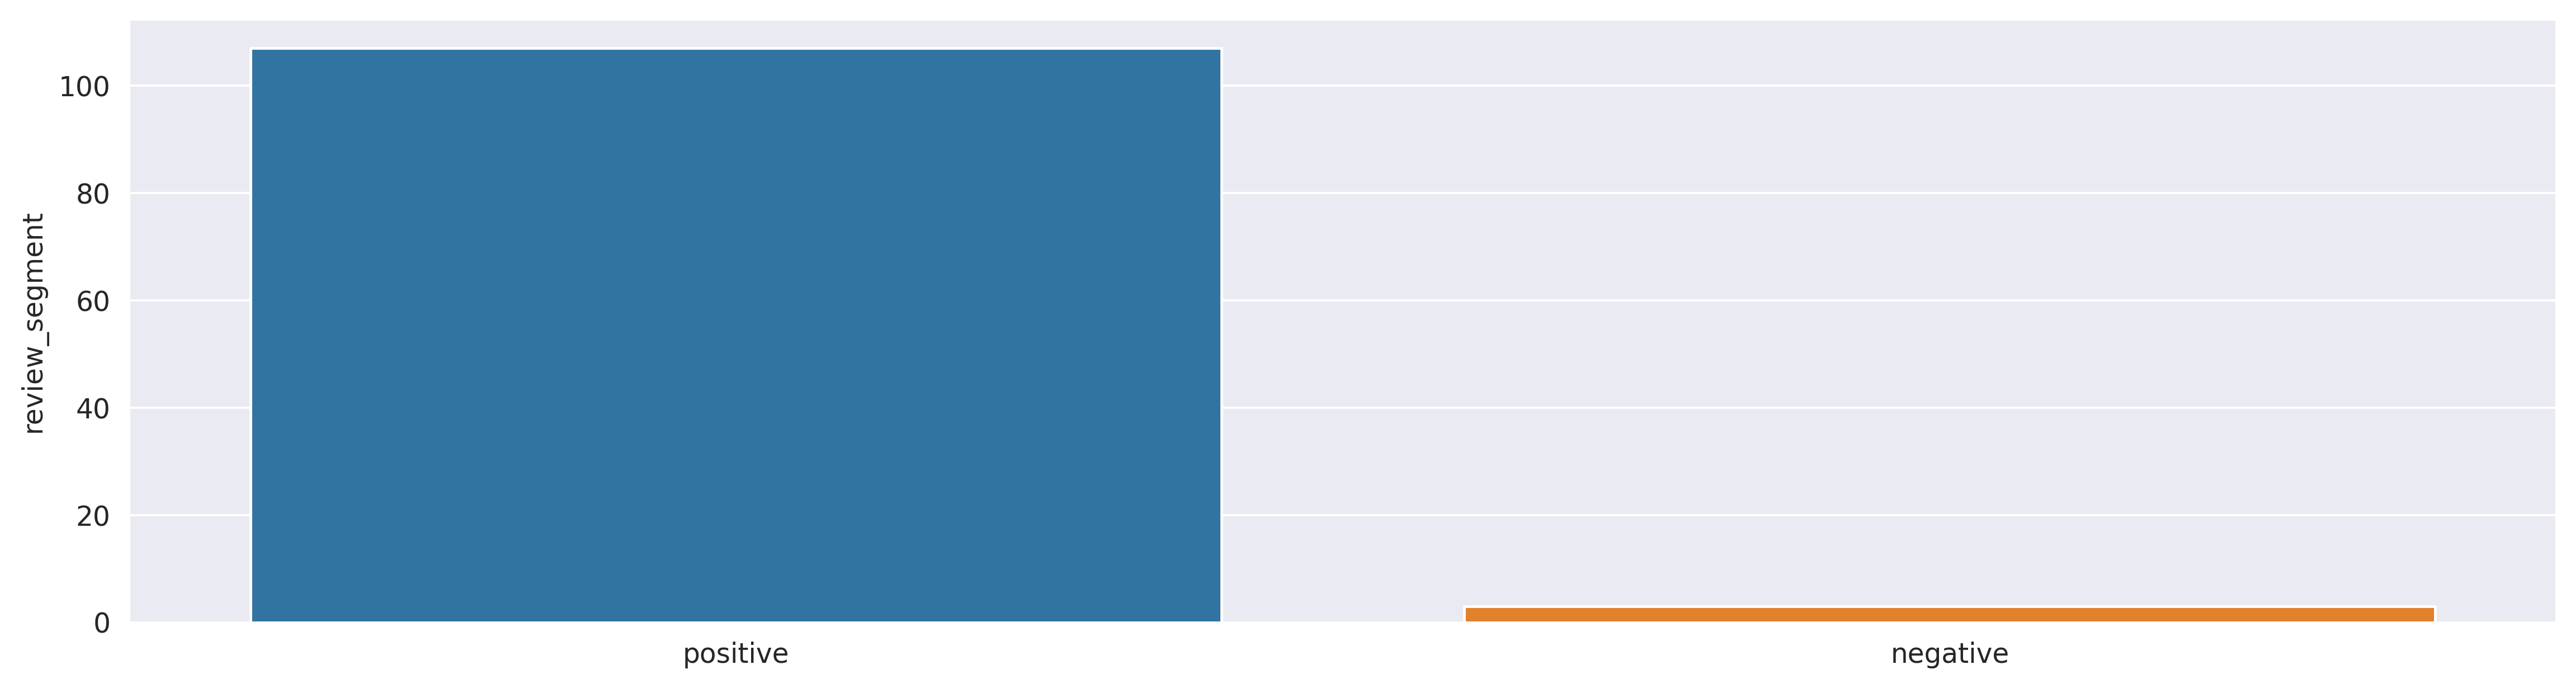

In [ ]:
sns.barplot(x =df_corpus['review_segment'].value_counts().index,y= df_corpus['review_segment'].value_counts())

<Axes: ylabel='review_segment'>

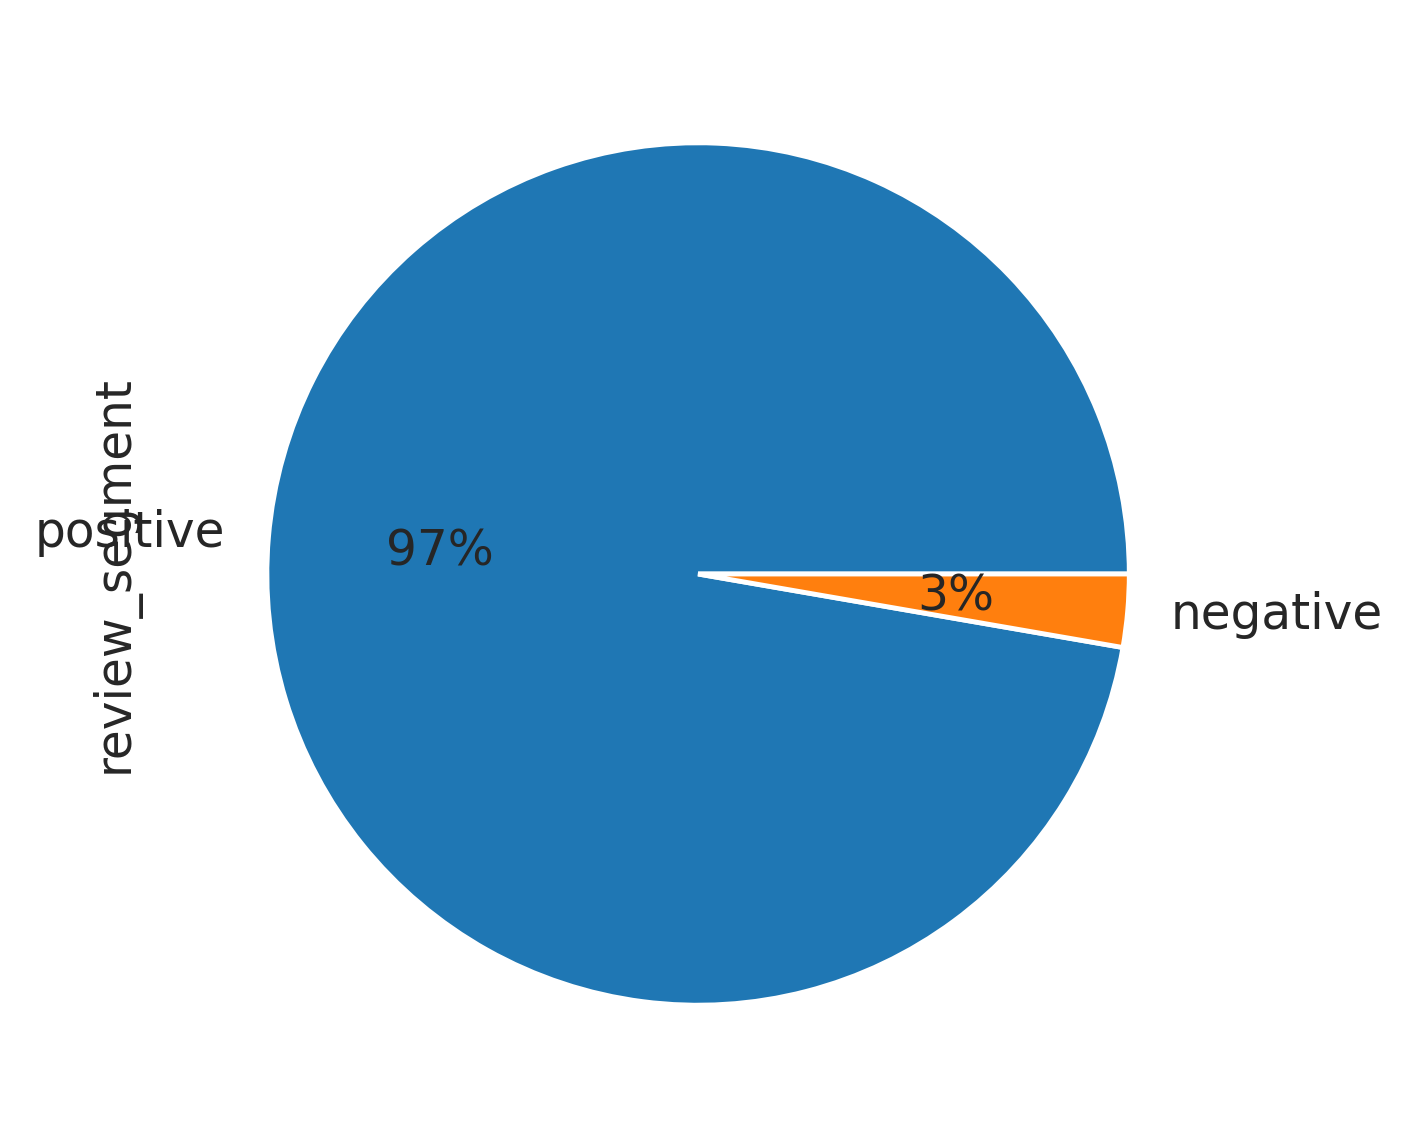

In [ ]:
df_corpus['review_segment'].value_counts().plot(kind='pie',autopct='%1.00f%%')